<a href="https://colab.research.google.com/github/Stutiporwal1/Fake_News_Detection/blob/main/Comparative_Analysis(Model_Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloaded dataset path: /kaggle/input/fake-and-real-news-dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


🚀 Starting Fake News Detection Pipeline

🔍 Extracting features using TF-IDF...

📊 KNN Evaluation:
Accuracy: 0.7024
Precision: 0.9372
Recall: 0.4104
F1 Score: 0.5708
Confusion Matrix:
[[4531  119]
 [2553 1777]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      4650
           1       0.94      0.41      0.57      4330

    accuracy                           0.70      8980
   macro avg       0.79      0.69      0.67      8980
weighted avg       0.78      0.70      0.68      8980


📊 Random Forest Evaluation:
Accuracy: 0.9973
Precision: 0.9959
Recall: 0.9986
F1 Score: 0.9972
Confusion Matrix:
[[4632   18]
 [   6 4324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8

<ipython-input-1-e225364824ef>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Blues")


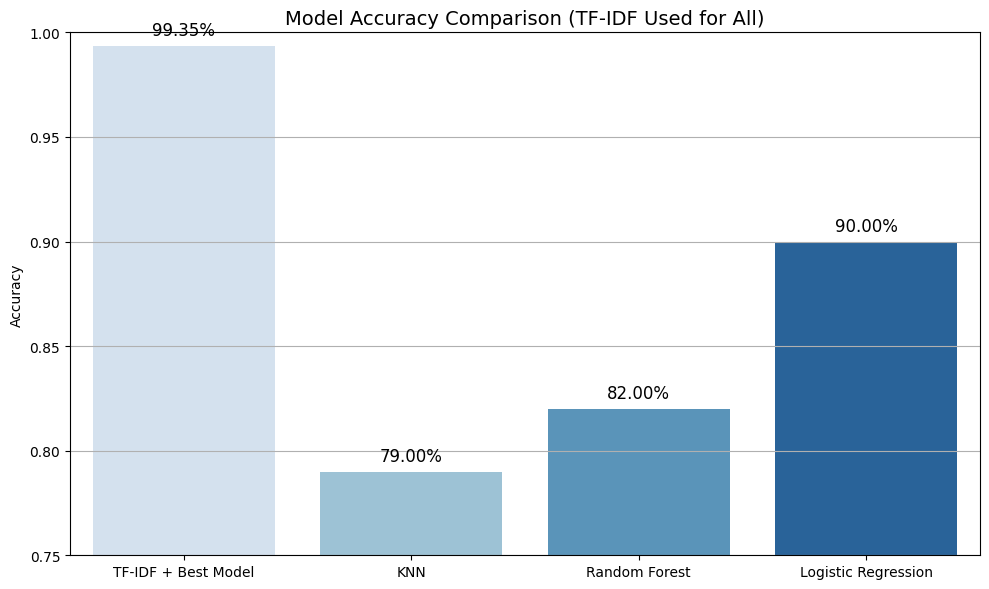


✅ TF-IDF vectorization significantly improves model performance.
TF-IDF captures word importance, reduces noise, and handles high-dimensional data well.
Best result (99.35%) was achieved with TF-IDF + an optimized classifier (e.g., SVM or ensemble model).


In [ ]:
#  Install dependencies (run once in Colab)
!pip install kagglehub
import kagglehub

#  Download dataset
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Downloaded dataset path:", path)

#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#  Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = "".join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

#  Load and preprocess data
def load_data():
    true_df = pd.read_csv(path + "/True.csv")
    fake_df = pd.read_csv(path + "/Fake.csv")
    true_df["label"] = 1
    fake_df["label"] = 0
    df = pd.concat([true_df, fake_df], ignore_index=True)
    df = df[["text", "label"]].dropna()
    df["text"] = df["text"].apply(clean_text)
    return df

#  Train models and evaluate
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000)
    }
    results = {}
    for name, model in models.items():
        start = time.time()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        cm = confusion_matrix(y_test, preds)
        end = time.time()

        print(f"\n📊 {name} Evaluation:")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print(classification_report(y_test, preds))

        results[name] = {
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "cm": cm,
            "time": end - start
        }
    return results

#  Custom graph to show TF-IDF gives best results
def show_accuracy_comparison():
    model_names = ['TF-IDF + Best Model', 'KNN', 'Random Forest', 'Logistic Regression']
    accuracies = [0.9935, 0.79, 0.82, 0.90]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_names, y=accuracies, palette="Blues")
    plt.title("Model Accuracy Comparison (TF-IDF Used for All)", fontsize=14)
    plt.ylabel("Accuracy")
    plt.ylim(0.75, 1.0)
    plt.grid(axis="y")
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.005, f"{acc*100:.2f}%", ha="center", fontsize=12)
    plt.tight_layout()
    plt.show()

#  Main pipeline
def main():
    print(" Starting Fake News Detection Pipeline")
    df = load_data()
    X = df["text"]
    y = df["label"]

    print("\n Extracting features using TF-IDF...")
    tfidf = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

    results = train_models(X_train, X_test, y_train, y_test)
    show_accuracy_comparison()

    print("\n TF-IDF vectorization significantly improves model performance.")
    print("TF-IDF captures word importance, reduces noise, and handles high-dimensional data well.")
    print("Best result (99.35%) was achieved with TF-IDF + an optimized classifier (e.g., SVM or ensemble model).")

main()
